In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pointbiserialr, pearsonr, chi2_contingency, shapiro, norm, linregress, spearmanr
from sklearn.utils import resample
df = pd.read_csv('/data/Supplemt 2 External_Dataset.csv')

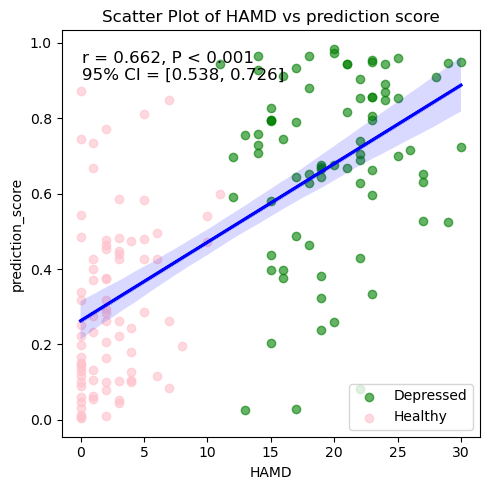

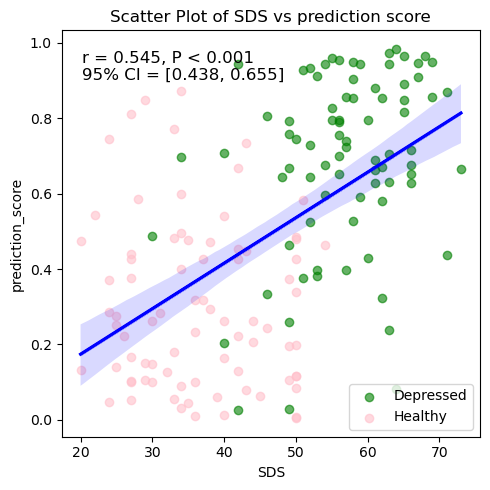

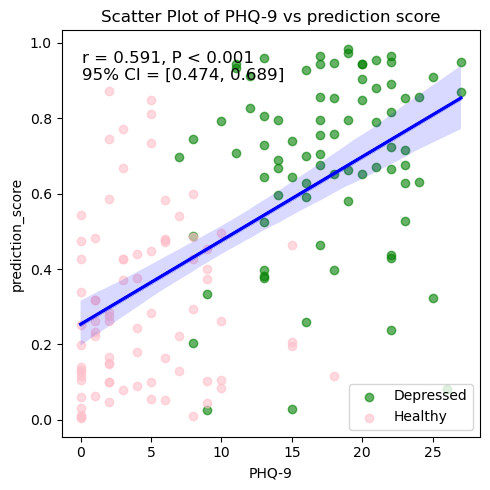

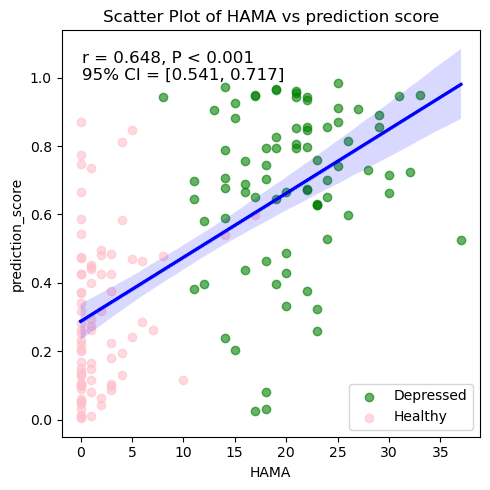

In [11]:
def plot_and_analyze(df, x_var, y_var):
    df_depressed = df[df['group'] == 'depressed']
    df_healthy = df[df['group'] == 'healthy']

    plt.figure(figsize=(5, 5))
    plt.scatter(df_depressed[x_var], df_depressed[y_var], color='green', label='Depressed', alpha=0.6)
    plt.scatter(df_healthy[x_var], df_healthy[y_var], color='pink', label='Healthy', alpha=0.6)

    r_value, p_value = spearmanr(df[x_var], df[y_var])
    n_iterations = 1000
    r_values = []

    for _ in range(n_iterations):
        sample = resample(df[[x_var, y_var]])
        if len(sample[x_var].unique()) > 1 and len(sample[y_var].unique()) > 1:  
            r, _ = spearmanr(sample[x_var], sample[y_var])
            r_values.append(r)

    r_values = np.array(r_values)
    ci_lower = np.percentile(r_values, 2.5)
    ci_upper = np.percentile(r_values, 97.5)
    slope, intercept, r_value, p_value, stderr = linregress(df[x_var], df[y_var])
    line = slope * df[x_var] + intercept

    sns.regplot(x=x_var, y=y_var, data=df, scatter=False, color='blue')
    slope, intercept = np.polyfit(df[x_var], df[y_var], 1)
    line = slope * df[x_var] + intercept
    plt.plot(df[x_var], line, color='blue')
    plt.fill_between(df[x_var], line - stderr, line + stderr, color='blue', alpha=0.2)
    
    p_value_str = f'P = {p_value:.3f}' if p_value >= 0.001 else 'P < 0.001'
    text_str = f'r = {r_value:.3f}, {p_value_str}\n95% CI = [{ci_lower:.3f}, {ci_upper:.3f}]'
    plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(loc='lower right')  
    

    plt.title(f'Scatter Plot of {x_var} vs prediction score')
    plt.tight_layout()
    plt.show()


# 分别绘制hamd17, sds, phq的图表并计算相关性
plot_and_analyze(df, 'HAMD', 'prediction_score')
plot_and_analyze(df, 'SDS', 'prediction_score')
plot_and_analyze(df, 'PHQ-9', 'prediction_score')
plot_and_analyze(df, 'HAMA', 'prediction_score')

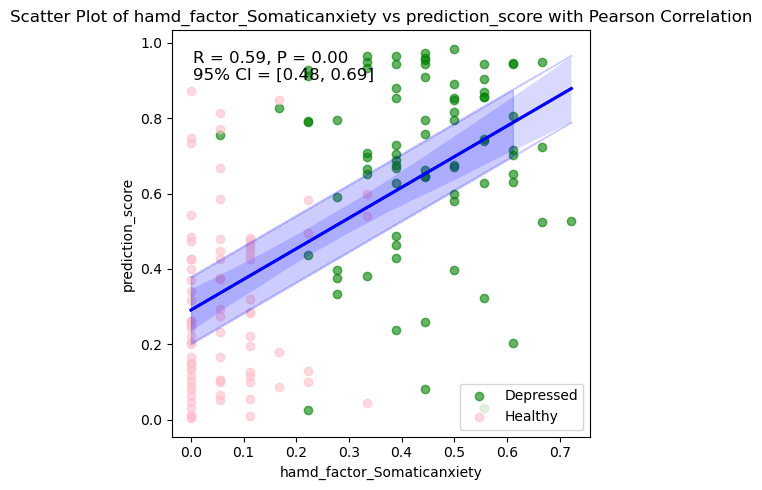

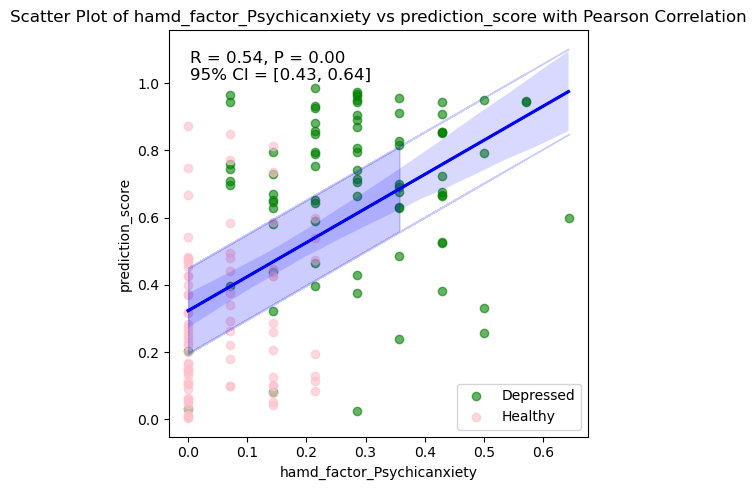

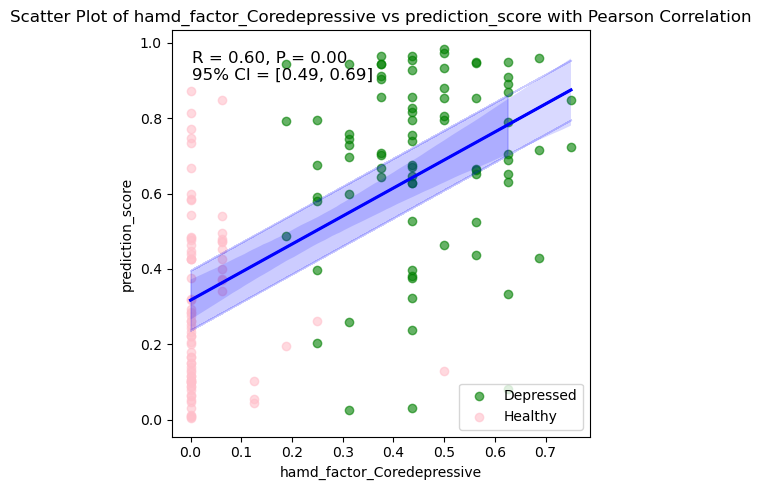

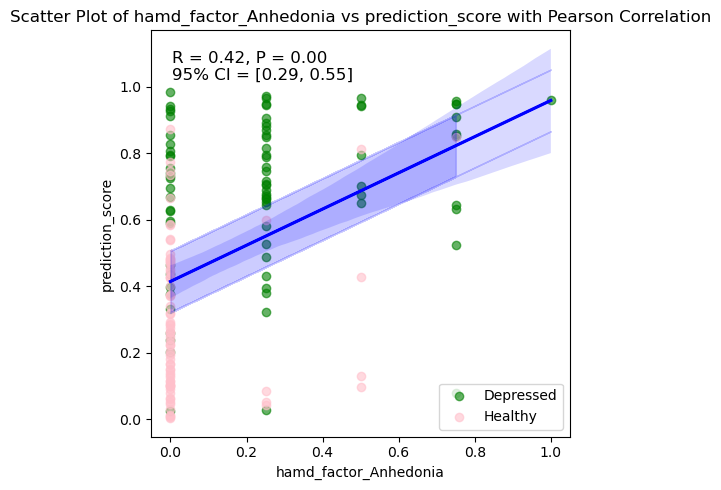

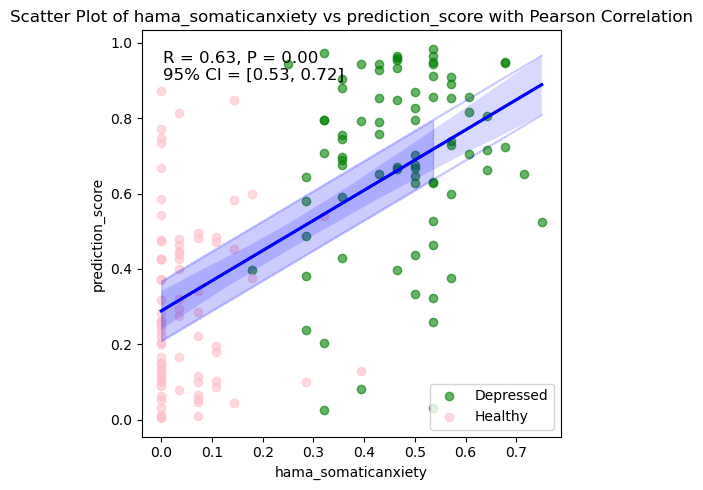

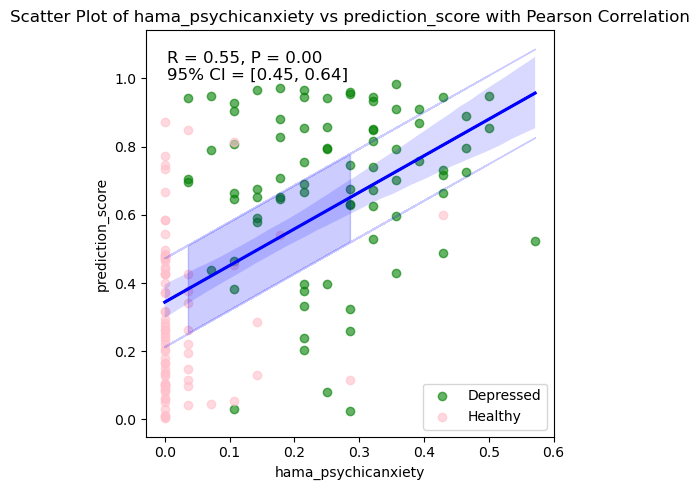

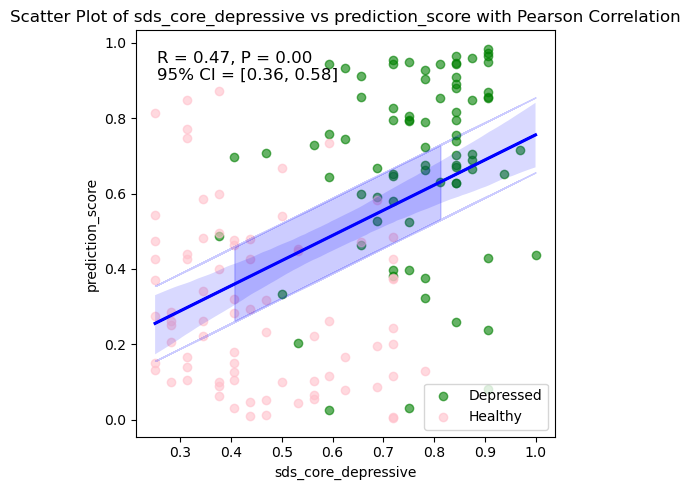

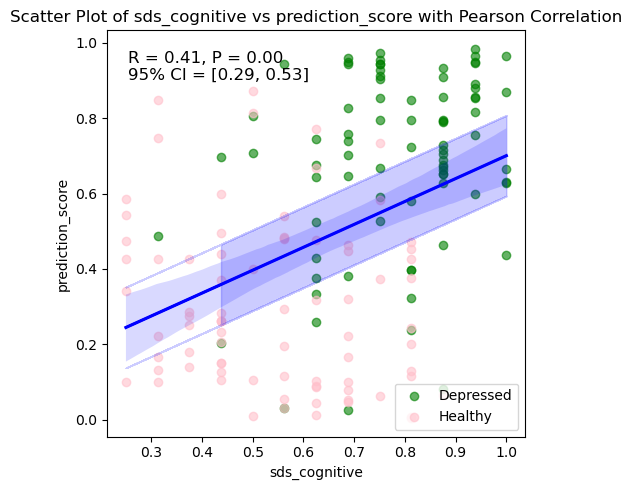

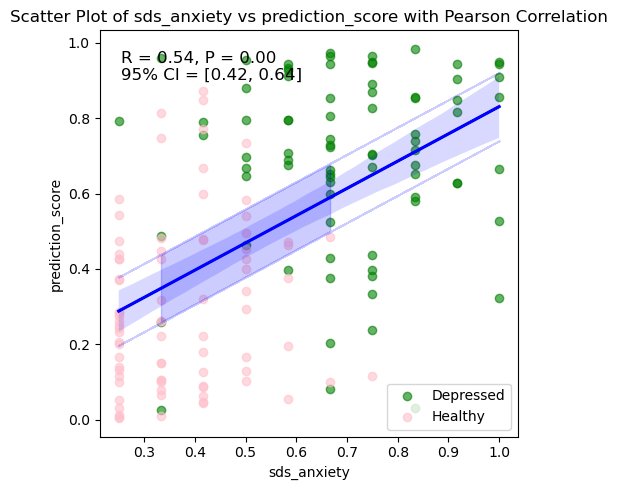

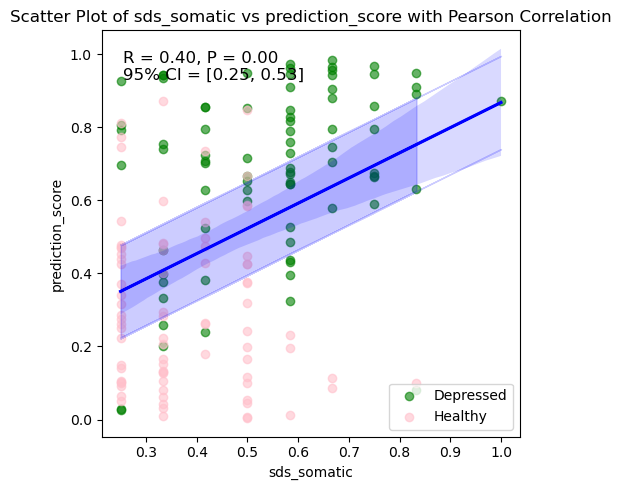

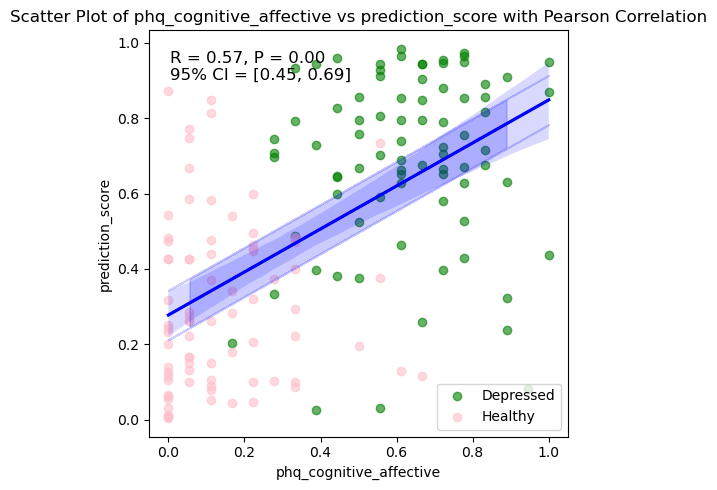

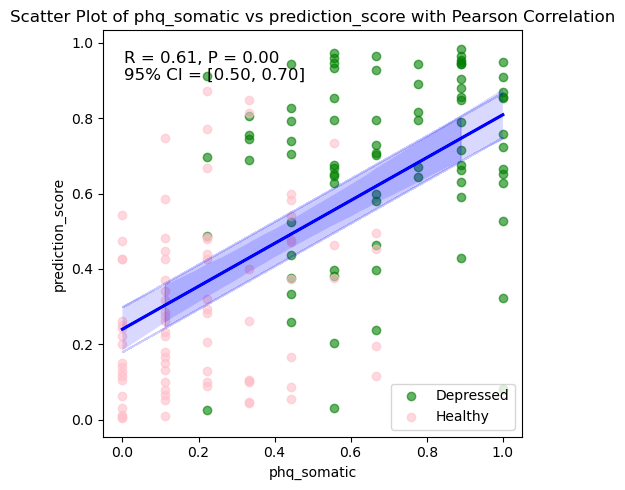